In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

In [3]:
from sklearn import datasets

In [4]:
iris = datasets.load_iris()
X = iris.data
feature_names = iris.feature_names
y = iris.target
target_names = iris.target_names

In [5]:
feature_names_cn = ["花萼长度", "花萼宽度", "花瓣长度", "花瓣宽度"]
feature_names, feature_names_cn

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 ['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'])

In [6]:
iris_df = pd.DataFrame(np.c_[X, y.reshape(-1, 1)], columns=["花萼长度", "花萼宽度", "花瓣长度", "花瓣宽度", "label"])
iris_df["label_name"] = iris_df["label"].map({i:name for i,name in enumerate(target_names)})
iris_df.sample(5)

,花萼长度,花萼宽度,花瓣长度,花瓣宽度,label,label_name
25,5.0,3.0,1.6,0.2,0.0,setosa
7,5.0,3.4,1.5,0.2,0.0,setosa
113,5.7,2.5,5.0,2.0,2.0,virginica
11,4.8,3.4,1.6,0.2,0.0,setosa
16,5.4,3.9,1.3,0.4,0.0,setosa


## sklearn中的DecisionTreeClassifier

In [7]:
# 导入sklearn的决策树
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
# classifier 分类
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
clf.score(X_test,y_test)

0.9666666666666667

In [11]:
clf.feature_importances_

array([0.00752037, 0.01880092, 0.07584566, 0.89783305])

windows下安装 graphviz:

```
下载msi或者zip安装或者解压，配置环境变量。显示graphviz的软件。
pip install graphviz安装python包。

```

**ubuntu下安装 graphviz**:
```sh
sudo apt-get install graphviz-dev
sudo apt-get install graphviz
pip3 install graphviz
```

In [12]:
#引入graphviz模块用来导出图,结果图如下所示
import graphviz
from sklearn import tree

[0.         0.01880092 0.08837961 0.89281948] score:0.9667


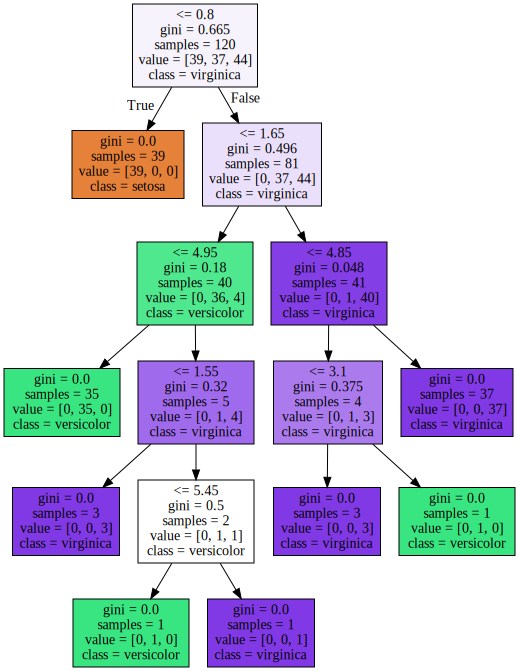

In [13]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(clf,out_file=None,
             feature_names=feature_names_cn, class_names=target_names, filled=True)
print(clf.feature_importances_, "score:%.4f" % clf.score(X_test, y_test))
graph = graphviz.Source(dot_data)
graph

criterion：‘gini’ or ‘entropy’ (default=”gini”)，前者是基尼系数，后者是信息熵。两种算法差异不大对准确率无影响，信息墒云孙效率低一点，因为它有对数运算.一般说使用默认的基尼系数”gini”就可以了，即CART算法。除非你更喜欢类似ID3, C4.5的最优特征选择方法。


[0.         0.02764493 0.09849491 0.87386016] score:0.9667


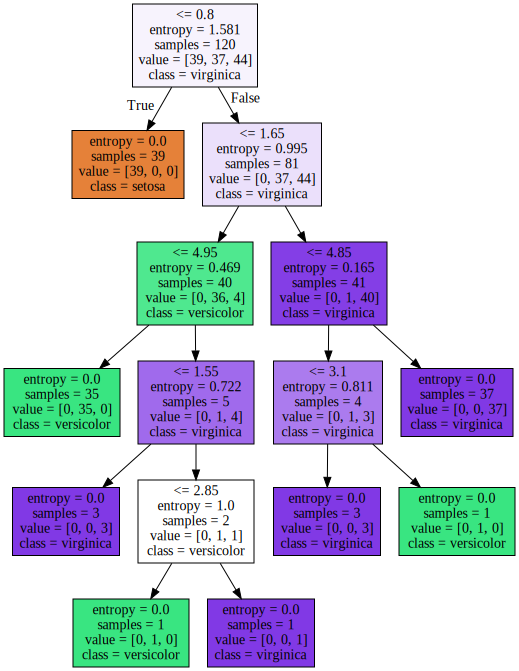

In [14]:
# 用gini和entropy的评分是差不多的，在这里可能选的第一个特征不同，但最后效果一样的，我算的花瓣长度	花瓣宽度下的信息增益基本一样
# DecisionTreeClassifier默认就会随机选择花瓣长度或者可能是花瓣长度和花瓣长度的信息熵一样
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(clf,out_file=None,
             feature_names=feature_names_cn, class_names=target_names, filled=True)
print(clf.feature_importances_, "score:%.4f" % clf.score(X_test, y_test))
graphviz.Source(dot_data)

通过后面自己对数据信息熵和基尼系数的计算，容易知道这些图的含义：

每个图的含义：

* 花瓣长度 <= 2.6 表示特征的分类条件，在这种情况下信息熵下降的最快  
* entropy = 1.581 表示y的信息熵为1.581，**是在没有特征的条件下的信息熵，就是H(y)**，不是H(y|某个x)或者信息增益  
* samples = 120 表示集合样本总数  
* value = [39, 37, 44] 每类y的数量，通过这个不就求出这个集合的信息熵了吗  
* class = virginica 最大概率被分到那个类，明显就是value哪个大就是哪个  
* 合起来就是这个集合的信息熵为1.581，共120个样本，每类的数量：[39, 37, 44]，这个集合的样本大部分是virginica类，在以花瓣长度 <= 2.6划分的条件下信息熵下降的最快(信息增益最大),以这个条件为决策条件  
* 基尼系数同理，就是计算的标准而已，都差不多  

整个树意思就是：不断的划分决策条件，每次都是以信息熵(基尼系数)下降最快的分割点划分分割，预测某个样本，样本必定从某条路线到达叶子节点，树的每条路径不是互斥的。

![](assets/DecisionTree_item_ex.png)

## 信息熵和基尼系数计算

* 在信息论与概率论中，熵(entropy)用于表示**随机变量不确定性的度量**。  
* 条件熵(conditional entropy)表示随机变量$X$给定的条件下，随机变量$Y$的条件熵$H(Y|X)  
* 信息增益表示的是：得知特征X的信息而使得类Y的信息的不确定性减少的程度。  

**熵(entropy)**的公式：

$H(X)= - \sum_{i=1}^{n} p_{i}log(p_i)$

设X是一个有限状态的离散型随机变量，其概率分布为
$P(X = x_i) = p_i,\ i=1,2,\cdots,n$


**条件熵(conditional entropy)**，随机变量$X$给定的条件下，随机变量$Y$的条件熵$H(Y|X)$定义为：

$H(Y|X) = \sum_{i=1}^{n}p_i H(Y|X=x_i)$

其中，$p_i = P(X = x_i)$。

**信息增益(information gain)**定义：

$g(D,A)=H(D)-H(D|A)$

**基尼系数**

分类问题中，假设有K个类别，样本点属于第$k$类的概率为$p_k$,则概率分布的基系指数定义为

$Gini(p)=\sum_{k=1}^{K}p_{k}(1-p_k)=1-\sum_{k=1}^{K}p_{k}^{2}$

就是把信息熵中的$-log(p_i)$换成了$1-p_i$。$p_i$的作用域为[0,1]，可以想象$-log(p_i)$函数在$1-p_i$的上方，信息熵算出来比基尼系数大，信息熵的函数下降的斜率不断降低(绝对值)，基尼系数函数的斜率就是-1。

In [15]:
iris_df.head()

,花萼长度,花萼宽度,花瓣长度,花瓣宽度,label,label_name
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [16]:
train_df = pd.DataFrame(np.c_[X_train, y_train.reshape(-1, 1)], 
                       columns=["花萼长度", "花萼宽度", "花瓣长度", "花瓣宽度", "label"])
train_df["label_name"] = train_df["label"].map({i:name for i,name in enumerate(target_names)})
label = train_df["label"]
label.value_counts()

2.0    44
0.0    39
1.0    37
Name: label, dtype: int64

In [17]:
# y值的信息熵
probs = label.value_counts() / label.sum()
(probs * -np.log2(probs)).sum()

1.5743892950040843

In [18]:
# 花萼长度下y值的信息熵
feature = train_df["花萼长度"].unique()
feature.sort() # 原地排序
feature

array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
       5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
       6.9, 7. , 7.2, 7.3, 7.4, 7.6, 7.7])

In [19]:
# unique返回的的是ndarray，所以这个通过这个建立的Series索引从0开始
feature_splits = (feature[1:] + feature[:-1])/2
feature_splits

array([4.35, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25, 5.35,
       5.45, 5.55, 5.65, 5.75, 5.85, 5.95, 6.05, 6.15, 6.25, 6.35, 6.45,
       6.55, 6.65, 6.75, 6.85, 6.95, 7.1 , 7.25, 7.35, 7.5 , 7.65])

In [20]:
def calc_feature_split_entropy(feature_split):
    # 每行的信息熵
    def apply_func(values):
        values = values[values != 0]
        probs = values / values.sum()
        return (probs * -np.log2(probs)).sum()
    
    crosstab = pd.crosstab(train_df["花萼长度"] <= feature_split, train_df["label"])
    # 每行的概率
    clf_probs = crosstab.sum(axis=1) / crosstab.sum(axis=1).sum()    
    clf_entropys = crosstab.apply(apply_func, axis=1)
    # 总的信息熵
    return np.sum(clf_probs * clf_entropys)

# 计算的信息增益被减数一样，比较谁最小即可。每个属性使信息增益值最大的划分点也是最小值
split_entropys = pd.Series(feature_splits).map(calc_feature_split_entropy)
feature_splits[split_entropys.values.argmin()], split_entropys.min()

(5.45, 0.9915977779185556)

In [21]:
# 求每个特征的下y的信息熵,和分割条件
def calc_entropy_and_split(feature, y):
    # 某个分割点的信息熵
    def calc_split_entropy(feature_split):
        # 每行的信息熵
        def apply_func(values):
            values = values[values != 0]
            probs = values / values.sum()
            return (probs * -np.log2(probs)).sum()
        
        crosstab = pd.crosstab(feature <= feature_split, y)
        # 每行的概率
        clf_probs = crosstab.sum(axis=1) / crosstab.sum(axis=1).sum()    
        clf_entropys = crosstab.apply(apply_func, axis=1)
        # 总的信息熵
        return np.sum(clf_probs * clf_entropys)
    
    feature_unique = feature.unique()
    feature_unique.sort()
    feature_splits = (feature_unique[1:] + feature_unique[:-1])/2
    # 每个分割点信息熵
    split_entropys = pd.Series(feature_splits).map(calc_split_entropy)
    # Series提示要使用idxmin
    argmin = split_entropys.idxmin()
    return [feature_splits[argmin], split_entropys[argmin]]

# 每个元素是数组
feature_entropys = pd.DataFrame(X_train).apply(calc_entropy_and_split, args=(y_train,))
feature_entropys

0                  [5.45, 0.9915977779185556]
1                  [2.95, 1.3243678991322019]
2    [2.5999999999999996, 0.6713590373778532]
3                   [0.8, 0.6713590373778532]
dtype: object

In [22]:
# y值的信息熵
probs = pd.Series(y_train).value_counts() / y_train.sum()
print( (probs * -np.log2(probs)).sum() )
# 信息增益
(probs * -np.log2(probs)).sum() - feature_entropys.map(lambda x: x[1])

1.5743892950040843


0    0.582792
1    0.250021
2    0.903030
3    0.903030
dtype: float64

In [23]:
# 改一下信息熵处的计算为计算基尼系数就成了以基尼系数为指标:
# (probs * -np.log2(probs)).sum() 改为 (probs * (1 - probs)).sum()
# 求每个特征的下y的基尼系数,和分割条件
def calc_gini_and_split(feature, y):
    # 某个分割点的基尼系数
    def calc_split_gini(feature_split):
        # 每行的基尼系数
        def apply_func(values):
            values = values[values != 0]
            probs = values / values.sum()
            return (probs * (1 - probs)).sum()
        
        crosstab = pd.crosstab(feature <= feature_split, y)
        # 每行的概率
        clf_probs = crosstab.sum(axis=1) / crosstab.sum(axis=1).sum()    
        clf_ginis = crosstab.apply(apply_func, axis=1)
        # 总的基尼系数
        return np.sum(clf_probs * clf_ginis)
    
    feature_unique = feature.unique()
    feature_unique.sort()
    feature_splits = (feature_unique[1:] + feature_unique[:-1])/2
    # 每个分割点基尼系数
    split_ginis = pd.Series(feature_splits).map(calc_split_gini)
    # Series提示要使用idxmin
    argmin = split_ginis.idxmin()
    return [feature_splits[argmin], split_ginis[argmin]]

# result_type='expand',会将返回的数组flat
# 如果apply返回的是Series，就会自动广播flat的
feature_ginis = pd.DataFrame(X_train).apply(calc_gini_and_split, result_type='expand', args=(y_train,)).T
feature_ginis

,0,1
0,5.45,0.422265
1,3.35,0.551993
2,2.60,0.334979
3,0.80,0.334979


In [24]:
# y值的基尼系数
probs = pd.Series(y_train).value_counts() / y_train.sum()
print( (1 - probs**2).sum() )
# 不是(1 - probs**2).sum() 是(probs * (1 - probs)).sum() 或者 1 - （probs**2).sum()
# 错误的！！！：feature_ginis["ygini"] = (1 - probs**2).sum() 
feature_ginis["ygini"] = (probs * (1 - probs)).sum()
# 基尼系数增益
feature_ginis["增益"] = ( 1 - (probs**2).sum() ) - feature_ginis.iloc[:,1]
feature_ginis

2.6911359999999998


,0,1,ygini,增益
0,5.45,0.422265,0.651136,0.268871
1,3.35,0.551993,0.651136,0.139143
2,2.60,0.334979,0.651136,0.356157
3,0.80,0.334979,0.651136,0.356157


下面是在某个特征下信息熵的计算测试：

In [25]:
train_df.groupby([train_df["花萼长度"] <= feature_splits[0], "label"])["label"].count()

花萼长度   label
False  0.0      38
       1.0      37
       2.0      44
True   0.0       1
Name: label, dtype: int64

In [26]:
pd.crosstab(train_df["花萼长度"] <= feature_splits[0], train_df["label"])

label,0.0,1.0,2.0
花萼长度,,,
False,38,37,44
True,1,0,0


In [27]:
# 每行的概率
a = pd.crosstab(train_df["花萼长度"] <= feature_splits[0], train_df["label"])
a.sum(axis=1) / a.sum(axis=1).sum()

花萼长度
False    0.991667
True     0.008333
dtype: float64

In [28]:
# 每行的信息熵
def apply_func(values):
    values = values[values != 0]
    probs = values / values.sum()
    return (probs * -np.log2(probs)).sum()
a.apply(apply_func, axis=1)

花萼长度
False    1.58065
True     0.00000
dtype: float64

In [29]:
# 总的信息熵
np.sum( a.sum(axis=1) / a.sum(axis=1).sum() * a.apply(apply_func, axis=1) )

1.5674775214539736

In [30]:
# 返回总是二维的
pd.crosstab(pd.Series([1,1]), pd.Series([1,2]) )

col_0,1,2
row_0,,
1,1,1


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X[:,:-1], y, test_size=0.2, random_state=0)

In [32]:
feature_entropys = pd.DataFrame(X_train).apply(calc_entropy_and_split, result_type='expand', args=(y_train,)).T
feature_entropys

,0,1
0,5.45,1.043287
1,3.05,1.331318
2,2.35,0.671359


In [33]:
feature_ginis = pd.DataFrame(X_train).apply(calc_gini_and_split, result_type='expand', args=(y_train,)).T
feature_ginis

,0,1
0,5.45,0.440985
1,3.05,0.562424
2,2.35,0.334979


In [34]:
# y值的基尼系数
probs = pd.Series(y_train).value_counts() / y_train.sum()
# 不是(1 - probs**2).sum() 是(probs * (1 - probs)).sum() 或者 1 - （probs**2).sum()
# 错误的！！！：feature_ginis["ygini"] = (1 - probs**2).sum() 
feature_ginis["ygini"] = (probs * (1 - probs)).sum()
feature_ginis["增益"] = feature_ginis["ygini"] - feature_ginis.iloc[:,1]
feature_ginis

,0,1,ygini,增益
0,5.45,0.440985,0.651136,0.210151
1,3.05,0.562424,0.651136,0.088712
2,2.35,0.334979,0.651136,0.316157


[0.06003355 0.01646894 0.92349751] score:0.9667


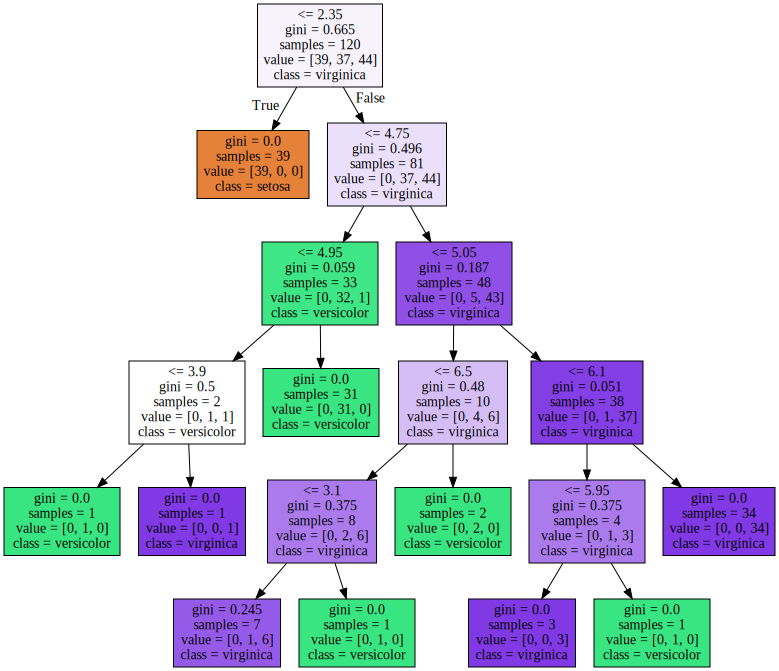

In [35]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(clf,out_file=None,
             feature_names=feature_names_cn[:-1], class_names=target_names, filled=True)
print(clf.feature_importances_, "score:%.4f" % clf.score(X_test, y_test))
graph = graphviz.Source(dot_data)
graph

In [36]:
feature_entropys = pd.DataFrame(X_train).apply(calc_entropy_and_split, result_type='expand', args=(y_train,)).T
feature_entropys

,0,1
0,5.45,1.043287
1,3.05,1.331318
2,2.35,0.671359


In [37]:
# y值的信息熵
probs = pd.Series(y_train).value_counts() / y_train.sum()
feature_entropys["y熵"] = (probs * -np.log2(probs)).sum()
feature_entropys["增益"] = feature_entropys["y熵"] - feature_entropys.iloc[:,1]
feature_entropys

,0,1,y熵,增益
0,5.45,1.043287,1.574389,0.531103
1,3.05,1.331318,1.574389,0.243072
2,2.35,0.671359,1.574389,0.903030


[0.0409108 0.        0.9590892] score:1.0000


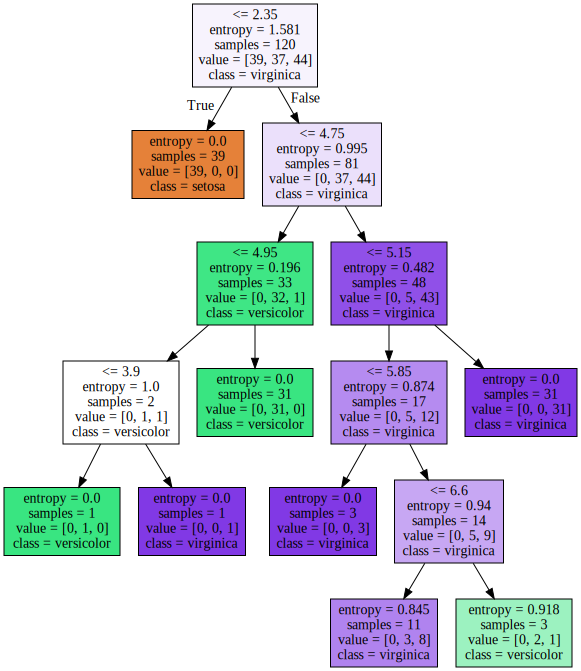

In [38]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(clf,out_file=None,
             feature_names=feature_names_cn[:-1], class_names=target_names, filled=True)
print(clf.feature_importances_, "score:%.4f" % clf.score(X_test, y_test))
graph = graphviz.Source(dot_data)
graph